In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop

from typing import List
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
model = models.Sequential()

input_shape = (224, 224, 3)

c = 64
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu',
                        input_shape=input_shape))

# defualt pool_size=(2, 2)
model.add(layers.MaxPool2D(padding='valid'))

c = 128
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.MaxPool2D(padding='valid'))

c = 256
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.MaxPool2D(padding='valid'))

c = 512
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.MaxPool2D(padding='valid'))

c = 512
model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.add(layers.Conv2D(filters=c, 
                        kernel_size=3, 
                        padding='same', 
                        activation='relu'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 conv2d_27 (Conv2D)          (None, 56, 56, 256)      

In [16]:
# DONE Sequential or Functional
def vggnet_model(config: List, batch_norm: bool, input_shape: List):
    model = models.Sequential()
    c = config[0]

    model.add(layers.Conv2D(filters=c, 
                            kernel_size=3, 
                            padding='same', 
                            activation='relu',
                            input_shape=input_shape))

    for c in config[1:]:
        if c == 'M':
            model.add(layers.MaxPool2D())
        else:
            model.add(layers.Conv2D(filters=c, 
                                    kernel_size=3, 
                                    activation='relu',
                                    padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu', input_dim=(512 * 7 * 7)))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(1000, activation='softmax'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [17]:
vgg_A_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg_B_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 
                512, 512, 'M', 512, 512, 'M']

vgg_C_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 
                512, 512, 512, 'M', 512, 512, 512, 'M']

vgg_E_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 
                512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']

In [18]:
input_shape = [224, 224, 3]
test_vggnet = vggnet_model(config=vgg_A_config, batch_norm=True, input_shape=input_shape)

print(test_vggnet.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 56, 56, 256)       295168    
                                                                 
 conv2d_35 (Conv2D)          (None, 56, 56, 256)      

In [27]:
input_shape = [150, 150, 3]
vggnet = vggnet_model(config=vgg_B_config, batch_norm=True, input_shape=input_shape)

In [28]:
vggnet.compile(loss='binary_crossentropy',
               optimizer=RMSprop(learning_rate=1e-4),
               metrics=['acc'])

In [29]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/Keras/code_test/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Keras/code_test


In [30]:
folder_dir = os.getcwd()
print(folder_dir)

/content/drive/MyDrive/Colab Notebooks/Keras/code_test


In [31]:
base_dir = folder_dir + '/datasets/cats_vs_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2009 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
for data_batch, labels_batch in train_generator:
    print(f"data batch shape  : {data_batch.shape}")
    print(f"labels batch shape: {labels_batch.shape}")
    break

data batch shape  : (20, 150, 150, 3)
labels batch shape: (20,)


In [33]:
# DONE model.fit_generator > model.fit
history = vggnet.fit(train_generator,
                     steps_per_epoch=100,
                     epochs=10,
                     validation_data=validation_generator, 
                     validation_steps=50)

# TODO 저장된 모델을 추후에 재학습        
vggnet.save('./models/cats_and_dogs_vggnet.h5')

Epoch 1/10
100/100 [==============================] - 23s 205ms/step - loss: 0.6932 - acc: 0.4806 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 20s 202ms/step - loss: 0.6932 - acc: 0.4892 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 20s 195ms/step - loss: 0.6931 - acc: 0.4982 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 20s 203ms/step - loss: 0.6936 - acc: 0.5018 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 20s 196ms/step - loss: 0.6936 - acc: 0.5018 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 20s 199ms/step - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 2

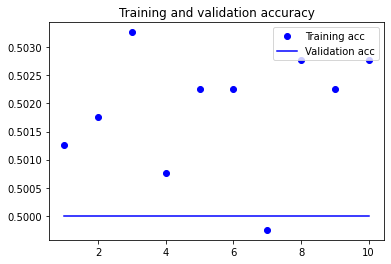

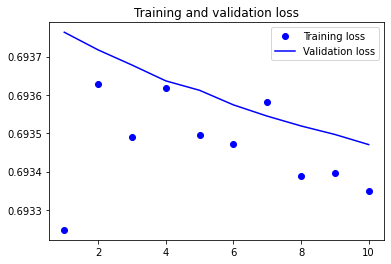

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##### VGGNet A 

Epoch 1/10
100/100 [==============================] - 25s 231ms/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6938 - val_acc: 0.5000

Epoch 2/10
100/100 [==============================] - 16s 162ms/step - loss: 0.6936 - acc: 0.5018 - val_loss: 0.6937 - val_acc: 0.5000

Epoch 3/10
100/100 [==============================] - 16s 159ms/step - loss: 0.6935 - acc: 0.5033 - val_loss: 0.6937 - val_acc: 0.5000

Epoch 4/10
100/100 [==============================] - 17s 166ms/step - loss: 0.6936 - acc: 0.5008 - val_loss: 0.6936 - val_acc: 0.5000

Epoch 5/10
100/100 [==============================] - 16s 158ms/step - loss: 0.6935 - acc: 0.5023 - val_loss: 0.6936 - val_acc: 0.5000

Epoch 6/10
100/100 [==============================] - 16s 160ms/step - loss: 0.6935 - acc: 0.5023 - val_loss: 0.6936 - val_acc: 0.5000

Epoch 7/10
100/100 [==============================] - 17s 167ms/step - loss: 0.6936 - acc: 0.4997 - val_loss: 0.6935 - val_acc: 0.5000

Epoch 8/10
100/100 [==============================] - 16s 156ms/step - loss: 0.6934 - acc: 0.5028 - val_loss: 0.6935 - val_acc: 0.5000

Epoch 9/10
100/100 [==============================] - 16s 157ms/step - loss: 0.6934 - acc: 0.5023 - val_loss: 0.6935 - val_acc: 0.5000

Epoch 10/10
100/100 [==============================] - 19s 194ms/step - loss: 0.6933 - acc: 0.5028 - val_loss: 0.6935 - val_acc: 0.5000

##### VGGNet B

Epoch 1/10
100/100 [==============================] - 23s 205ms/step - loss: 0.6932 - acc: 0.4806 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 2/10
100/100 [==============================] - 20s 202ms/step - loss: 0.6932 - acc: 0.4892 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 3/10
100/100 [==============================] - 20s 195ms/step - loss: 0.6931 - acc: 0.4982 - val_loss: 0.6928 - val_acc: 0.5000

Epoch 4/10
100/100 [==============================] - 20s 203ms/step - loss: 0.6936 - acc: 0.5018 - val_loss: 0.6937 - val_acc: 0.5000

Epoch 5/10
100/100 [==============================] - 20s 196ms/step - loss: 0.6936 - acc: 0.5018 - val_loss: 0.6937 - val_acc: 0.5000

Epoch 6/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6937 - val_acc: 0.5000

Epoch 7/10
100/100 [==============================] - 20s 199ms/step - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6936 - val_acc: 0.5000

Epoch 8/10
100/100 [==============================] - 20s 200ms/step - loss: 0.6935 - acc: 0.5023 - val_loss: 0.6936 - val_acc: 0.5000

Epoch 9/10
100/100 [==============================] - 20s 198ms/step - loss: 0.6935 - acc: 0.5008 - val_loss: 0.6935 - val_acc: 0.5000

Epoch 10/10
100/100 [==============================] - 20s 197ms/step - loss: 0.6935 - acc: 0.5008 - val_loss: 0.6935 - val_acc: 0.5000